# 线性回归的从零实现

In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
def synthetic_data(w,b,num_examples):
    X = torch.normal(0,1,(num_examples,len(w)))
    y = torch.matmul(X,w)+b
    y+=torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))

In [4]:
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = synthetic_data(true_w,true_b,1000)

In [5]:
print('features:',features[0],'\nlabel:',labels[0])

features: tensor([0.8720, 0.0196]) 
label: tensor([5.8614])


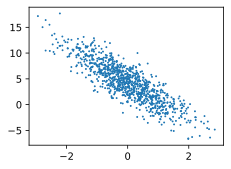

In [7]:
d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].detach().numpy(),labels.detach().numpy(),1)

In [8]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))

    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i+batch_size,num_examples)]
        )

        yield features[batch_indices],labels[batch_indices]

In [9]:
batch_size = 10

for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

tensor([[ 0.4029, -0.1866],
        [-2.0004,  1.9849],
        [-1.3367, -0.3499],
        [ 1.0682,  1.1590],
        [ 0.0376,  0.7263],
        [ 0.3833, -0.8500],
        [ 0.6428, -0.4550],
        [-0.5967, -0.7954],
        [-0.5374, -0.4696],
        [ 0.1753,  1.4610]]) 
 tensor([[ 5.6499],
        [-6.5584],
        [ 2.7161],
        [ 2.3927],
        [ 1.8131],
        [ 7.8668],
        [ 7.0466],
        [ 5.6977],
        [ 4.7102],
        [-0.4150]])


In [10]:
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

In [11]:
def linreg(X,w,b):
    return torch.matmul(X,w)+b

In [12]:
def squared_loss(y_hat,y):
    return (y_hat-y.reshape(y_hat.shape))**2/2

In [14]:
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr* param.grad/batch_size
            param.grad.zero_()

In [15]:
lr = 0.03 
num_epochs = 3
net = linreg
loss = squared_loss

In [16]:
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch{epoch+1},loss{float(train_l.mean()):f}')

epoch1,loss0.036279
epoch2,loss0.000133
epoch3,loss0.000050


In [17]:
print(f'w的误差估计：{true_w-w.reshape(true_w.shape)}')
print(f'b的误差估计：{true_b-b}')

w的误差估计：tensor([ 0.0001, -0.0003], grad_fn=<SubBackward0>)
b的误差估计：tensor([0.0007], grad_fn=<RsubBackward1>)
